First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300

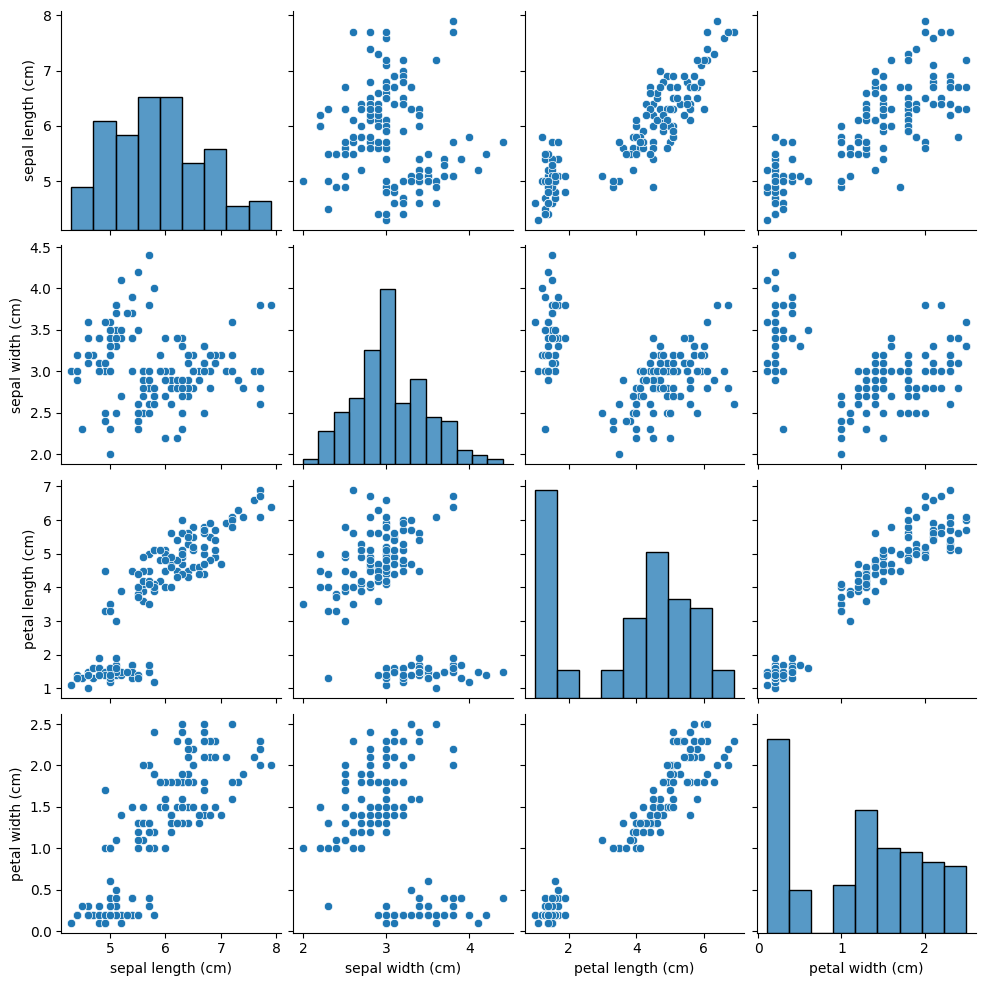

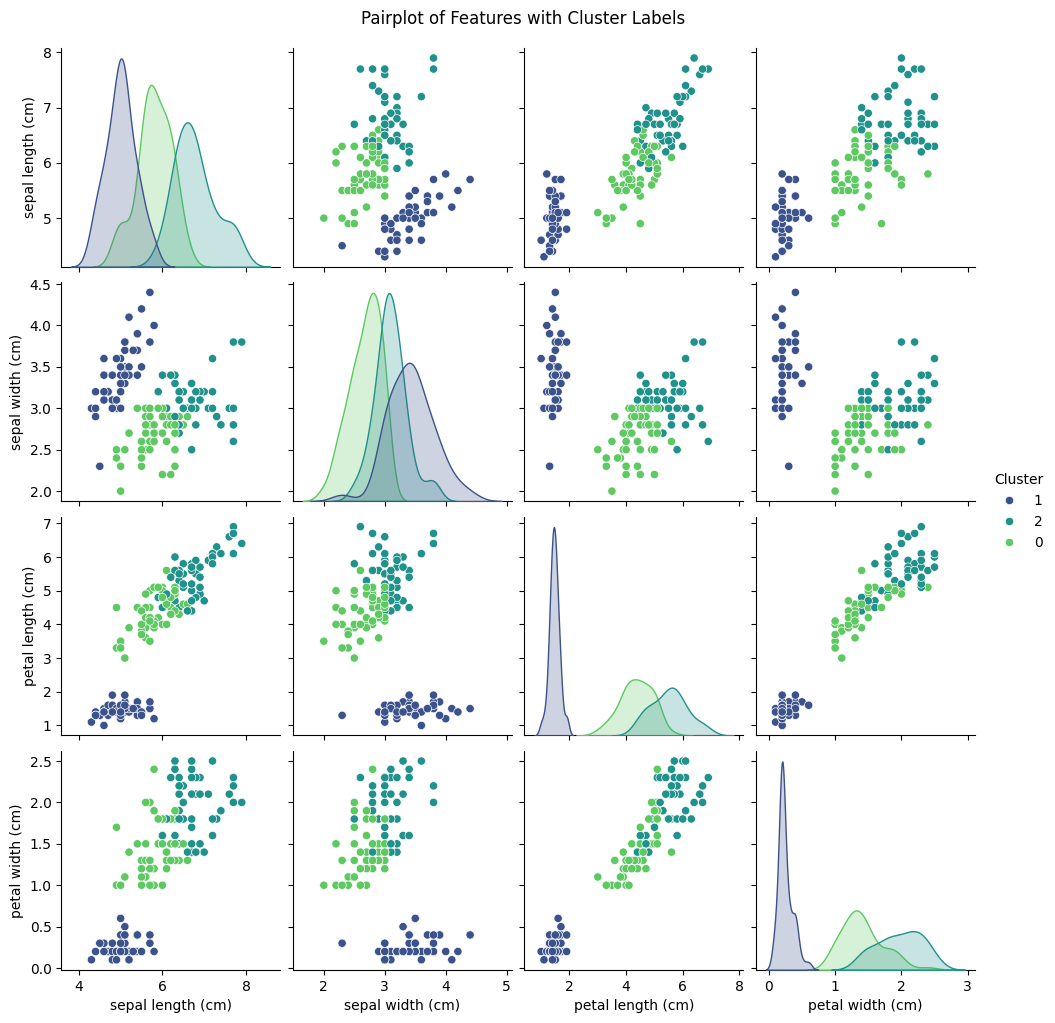

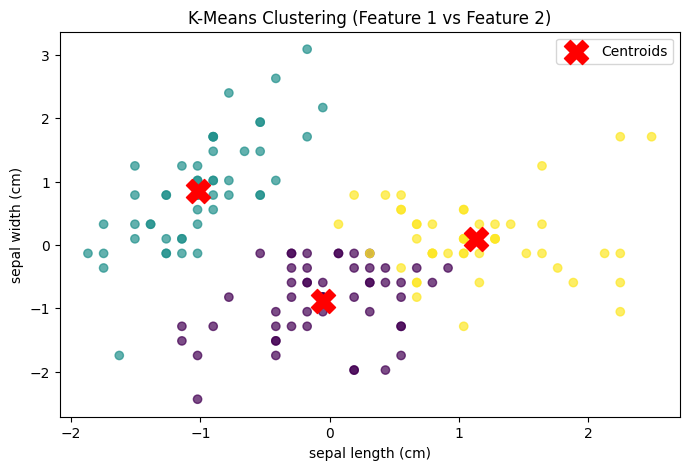

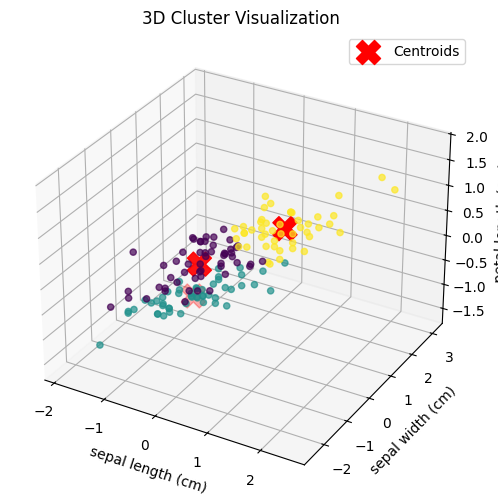


 Model Evaluation Metrics:
 Silhouette Score: 0.460 (Higher is better)
 Davies-Bouldin Index: 0.834 (Lower is better)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

# Pairplot before clustering
sns.pairplot(df)
plt.show()

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)



kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize Clusters (Pairplot)
df['Cluster'] = df['Cluster'].astype(str)  # Convert cluster labels to string for visualization
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot of Features with Cluster Labels", y=1.02)
plt.show()

# Scatter plot of first two features with clusters
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['Cluster'].astype(int), cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering (Feature 1 vs Feature 2)')
plt.legend()
plt.show()

# 3D Visualization of Clusters (First Three Features)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], 
                      c=df['Cluster'].astype(int), cmap='viridis', alpha=0.7)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=300, c='red', marker='X', label='Centroids')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title("3D Cluster Visualization")
ax.legend()
plt.show()

# 9Model Evaluation
sil_score = silhouette_score(scaled_data, df['Cluster'].astype(int))
db_index = davies_bouldin_score(scaled_data, df['Cluster'].astype(int))

print("\n Model Evaluation Metrics:")
print(f" Silhouette Score: {sil_score:.3f} (Higher is better)")
print(f" Davies-Bouldin Index: {db_index:.3f} (Lower is better)")

